In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img  = cv2.imread("data/semafor.bmp",0)
# template = cv2.imread("data/Image2.jpg",0)
template = np.array([[255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255]])
template_b = np.array([[255, 255, 255,255,255, 255, 255, 255,255, 255, 255,255,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255,255,255]])

In [4]:
template_b.shape

(13, 13)

In [5]:
template[0].shape

(11,)

In [6]:
print(template.shape)
print(img.shape)
h_t, w_t = template.shape

(11, 11)
(253, 167)


In [7]:
def fit(image, temp,a,b):
#     c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] != image[b-h_t//2+v,a-w_t//2+u]:
                return 0
    return 255

In [8]:
def match(img,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(w_t//2,w-w_t//2):
        for j in range(h_t//2,h-h_t//2):
            c = fit(img,t,i,j)
            empty[j,i] = c
    return empty

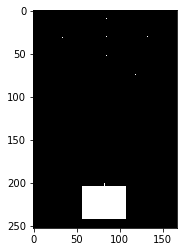

In [11]:
e = match(img,template)
plt.imshow(e,cmap='gray')
show(e)

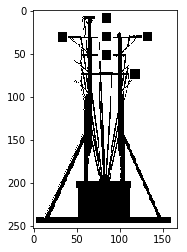

In [12]:
img_inv = cv2.bitwise_not(img)
plt.imshow(img_inv,cmap='gray')

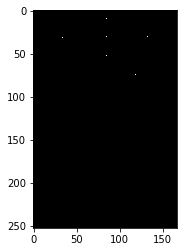

In [14]:
e_inv = match(img_inv,template_b)
plt.imshow(e_inv,cmap='gray')
show(e_inv)

In [17]:
show(match(e,e_inv[:150]))